In [91]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [92]:
from ete3 import Tree

# Load the .nhx tree (NHX is a superset of Newick)
t = Tree("/Users/dinukaariyaratne/Downloads/DEN2_mol_clock/modified_tree.nhx", format=1)  # format=1 means internal node data (like NHX tags)

# Write a Newick (".nwk") version
t.write(format=0, outfile="Global_tree.nwk")

In [93]:
from Bio import Phylo
Phylo.read("Global_tree.nwk", "newick")

Tree(rooted=False, weight=1.0)

In [109]:
import pandas as pd
from treetime import TreeTime

# 1) Read metadata into a dictionary { seqName: date }
metadata = pd.read_csv("/Users/dinukaariyaratne/Downloads/DEN2_mol_clock/metadata_DENV2.csv")

date_dict = {}
for idx, row in metadata.iterrows():
    seq_id = row["tip"]  # Assuming your CSV has columns named 'label' and 'date'
    date = row["date"]
    date_dict[seq_id] = date

# 2) Initialize TreeTime
tt = TreeTime(
    tree="Global_tree.nwk",  # Ensure that the file is in the correct directory
    aln="/Users/dinukaariyaratne/Downloads/DEN2_mol_clock/Galaxy119-[MAFFT add on data 111 and data 118 _ New alignment].fasta",
    dates=date_dict,
    gtr="JC69",  # Substitution model, ensure appropriate choice
    verbose=3
)

# 3) Run the timescaling
tt.run(
    root="best",  # Automatically choose the best root
    clock_filter=0.1  # Filter for outlier branches
)


0.00	-TreeAnc: set-up

0.01	WARNING: TreeTime has detected branches that are longer than 4. TreeTime
    	requires trees where branch length is in units of average number of
    	nucleotide or protein substitutions per site. Use on trees with longer
    	branches is not recommended for ancestral sequence reconstruction.

0.51	-SequenceData: loaded alignment.

0.51	-SeqData: making compressed alignment...

1.35	-SequenceData: constructed compressed alignment...
1.36	---**WARNING: Number of tips in tree (425) differs from number of sequences
    	   in alignment (285)**

1.36	***WARNING: TreeAnc._check_alignment_tree_gtr_consistency: NO SEQUENCE FOR
    	LEAF: '2000_1_10679__Venezuela_FJ898466.1'

1.36	***WARNING: TreeAnc._check_alignment_tree_gtr_consistency: NO SEQUENCE FOR
    	LEAF: '2007_1_10623__Colombia_GU131947.1'

1.36	***WARNING: TreeAnc._check_alignment_tree_gtr_consistency: NO SEQUENCE FOR
    	LEAF: '2008_1_10664__Venezuela_FJ850108.1'

1.36	***WARNING: TreeAnc._check_align

MissingDataError: TreeAnc._check_alignment_tree_gtr_consistency: At least 30\% terminal nodes cannot be assigned a sequence!
Are you sure the alignment belongs to the tree?

In [98]:
from Bio import Phylo
from Bio import SeqIO

# A) Load the tree
tree = Phylo.read("Global_tree.nwk", "newick")
tree_tips = [term.name for term in tree.get_terminals()]
print("Number of tips in tree:", len(tree_tips))

# B) Load the alignment
alignment_records = list(SeqIO.parse(
  "/Users/dinukaariyaratne/Downloads/Galaxy119-[MAFFT add on data 111 and data 118 _ New alignment].fasta",
  "fasta"
))
aln_ids = [rec.id for rec in alignment_records]
print("Number of seqs in alignment:", len(aln_ids))

# C) Compare sets
missing_in_alignment = set(tree_tips) - set(aln_ids)
if missing_in_alignment:
    print("These tree tips were not found in the alignment:", missing_in_alignment)
else:
    print("All tree tips appear in the alignment!")


Number of tips in tree: 425
Number of seqs in alignment: 425
These tree tips were not found in the alignment: {'2018_M45A_1_10723', '2007_1_10668__Venezuela_EU482606.1', '2018_Y29_1_10723', '2001_1_10678__Thailand_FJ744711.1', '2012_1_10723__Singapore_MW512376.1', '2018_R48_1_10723', '2018_TG40_1_10723', '2007_1_10428__Cambodia_GU131897.1', '2005_1_10647__Colombia_FJ024473.1', '2013_08_27_1_10656__Pakistan_KJ701507.1', '2003_1_10559__Viet_Nam_FM210204.1', '2005_1_10694__Viet_Nam_FM210213.1', 'OR393914.1__Dengue_virus', 'OR394036.1__Dengue_virus', '2008_1_10678__Viet_Nam_FJ461311.1', '2011_01_24_1_10723__Peru_KC294218.1', 'PP234965.1__Dengue_virus', '2011_1_10723__Singapore_MW512367.1', '2023_07_26_1_10723__Malaysia_PQ357520.1', '2004_1_10677__Cambodia_FJ639706.1', 'OR394028.1__Dengue_virus', '2008_1_10557__Cambodia_GU131924.1', '2015_03_1_10723__Singapore_KY921905.1', '2018_1_10683__China_MK783203.1', '2018_R1_1_10723_2018_DENV2', 'OR393915.1__Dengue_virus', '2017_09_1_10176__China_MH1

In [99]:
from Bio import SeqIO

fixed_records = []
for rec in SeqIO.parse("/Users/dinukaariyaratne/Downloads/Galaxy119-[MAFFT add on data 111 and data 118 _ New alignment].fasta", "fasta"):
    # e.g. change spaces to underscores
    new_id = rec.id.replace(" ", "_").replace("|Viet Nam|", "|Viet_Nam|")
    # or systematically replicate the tree’s pattern
    rec.id = new_id
    rec.description = ""  # Clear out any old description
    fixed_records.append(rec)

SeqIO.write(fixed_records, "alignment_fixed.fasta", "fasta")

425

In [100]:
from Bio import Phylo, SeqIO

# 1) Load the tree
tree = Phylo.read("Global_tree.nwk", "newick")

# 2) Load the alignment
alignment_records = list(SeqIO.parse("alignment_fixed.fasta", "fasta"))
aln_ids = {rec.id for rec in alignment_records}

# 3) Prune any tip whose name doesn’t appear in the alignment
for leaf in tree.get_terminals():
    if leaf.name not in aln_ids:
        tree.prune(leaf)

# 4) Save the pruned tree
Phylo.write(tree, "Global_tree_pruned.nwk", "newick")

ValueError: can't find a matching target below this root

In [105]:
# 1) Read metadata into a dictionary { seqName: date }
metadata = pd.read_csv(
    "/Users/dinukaariyaratne/Downloads/DEN2_mol_clock/metadata_DENV2.csv"
)
date_dict = {}
for idx, row in metadata.iterrows():
    seq_id = row["label"]
    date = row["date"]
    date_dict[seq_id] = date

# 2) Initialize TreeTime
tt = TreeTime(
    tree="Global_tree.nwk",
    aln="/Users/dinukaariyaratne/Downloads/DEN2_mol_clock/Galaxy119-[MAFFT add on data 111 and data 118 _ New alignment].fasta",
    dates=date_dict,
    gtr="JC69",           # or "HKY", "GTR", etc.
    verbose=3
)

# 3) Run the timescaling
tt.run(
    root="best",          # let TreeTime choose a root automatically
    clock_filter=0.1      # remove outlier branches
)

KeyError: 'label'

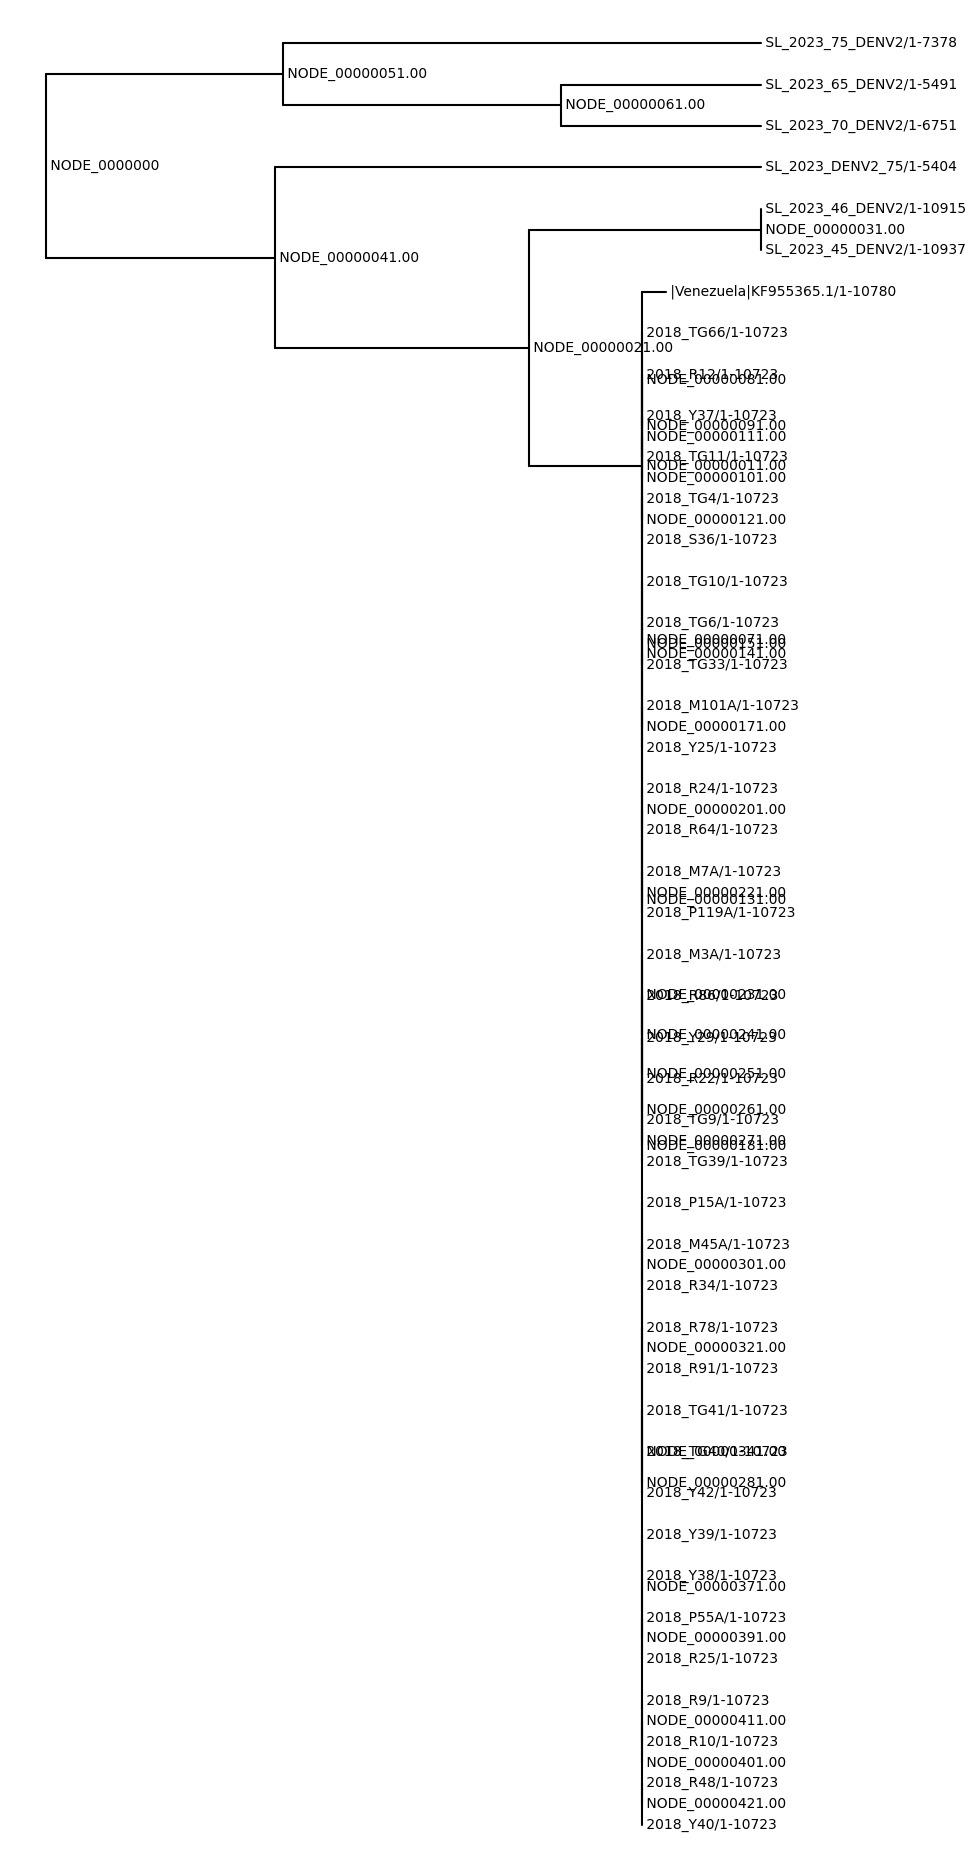

<Figure size 640x480 with 0 Axes>

In [87]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Read the tree
tree = Phylo.read("timed_tree.nwk", "newick")

# Create a new figure with a custom size, e.g. 8 inches wide x 12 inches tall
fig = plt.figure(figsize=(12, 24))

# Add an Axes object to the figure
ax = fig.add_subplot(1, 1, 1)
ax.set_axis_off()

# Draw the tree on that Axes
Phylo.draw(tree, axes=ax)

# Save your figure
plt.savefig("TimeScaled_DENV2_tree_taller.png", dpi=300)
plt.show()

SL_2023_75_DENV2/1-7378 2023.0
SL_2023_65_DENV2/1-5491 2023.0
SL_2023_70_DENV2/1-6751 2023.0
SL_2023_DENV2_75/1-5404 2023.0
SL_2023_46_DENV2/1-10915 2023.0
SL_2023_45_DENV2/1-10937 2023.0
|Venezuela|KF955365.1/1-10780 2019.0
2018_TG66/1-10723 2018.0
2018_R12/1-10723 2018.0
2018_Y37/1-10723 2018.0
2018_TG11/1-10723 2018.0
2018_TG4/1-10723 2018.0
2018_S36/1-10723 2018.0
2018_TG10/1-10723 2018.0
2018_TG6/1-10723 2018.0
2018_TG33/1-10723 2018.0
2018_M101A/1-10723 2018.0
2018_Y25/1-10723 2018.0
2018_R24/1-10723 2018.0
2018_R64/1-10723 2018.0
2018_M7A/1-10723 2018.0
2018_P119A/1-10723 2018.0
2018_M3A/1-10723 2018.0
2018_R86/1-10723 2018.0
2018_Y29/1-10723 2018.0
2018_R22/1-10723 2018.0
2018_TG9/1-10723 2018.0
2018_TG39/1-10723 2018.0
2018_P15A/1-10723 2018.0
2018_M45A/1-10723 2018.0
2018_R34/1-10723 2018.0
2018_R78/1-10723 2018.0
2018_R91/1-10723 2018.0
2018_TG41/1-10723 2018.0
2018_TG40/1-10723 2018.0
2018_Y42/1-10723 2018.0
2018_Y39/1-10723 2018.0
2018_Y38/1-10723 2018.0
2018_P55A/1-10723 

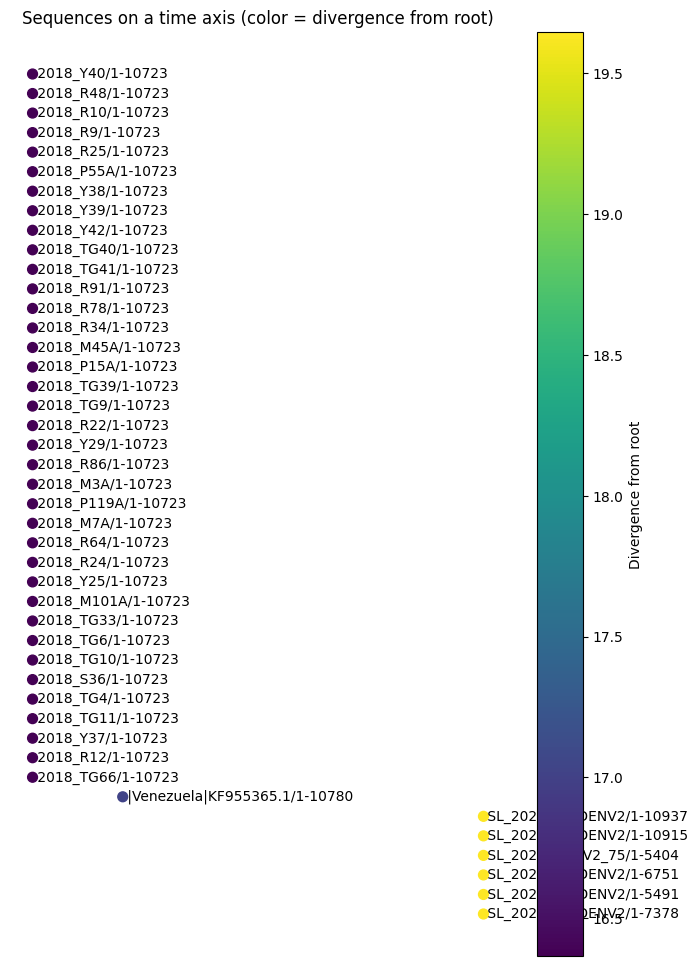

In [82]:
from Bio import Phylo
import matplotlib.pyplot as plt

# after tt.run()
tree = tt.tree  #  Bio.Phylo tree with time-scaled results

# diagnose:
for t in tree.get_terminals():
    print(t.name, getattr(t, 'numdate', None))  # check numeric date

root = tree.root
tips_data = []
for tip in tree.get_terminals():
    if hasattr(tip, 'numdate'):
        sampling_time = tip.numdate
        divergence = tree.distance(root, tip)
        tips_data.append((tip.name, sampling_time, divergence))

# If tips_data is empty, that means no tip.numdate was found

labels = [x[0] for x in tips_data]
xvals  = [x[1] for x in tips_data]  # decimal years
cvals  = [x[2] for x in tips_data]  # divergence
yvals  = range(len(tips_data))      # vertical index for scatter

fig, ax = plt.subplots(figsize=(8, 12))
sc = ax.scatter(xvals, yvals, c=cvals, cmap='viridis', s=50)
ax.set_axis_off()  # if you don't want axes showing
plt.colorbar(sc, label="Divergence from root")
for label, x, y in zip(labels, xvals, yvals):
    ax.text(x, y, " " + label, va="center", ha="left")
plt.title("Sequences on a time axis (color = divergence from root)")
plt.show()


/var/folders/6r/5xp0j57s5d340snn81cnn0y80000gn/T/ipykernel_59433/537353074.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


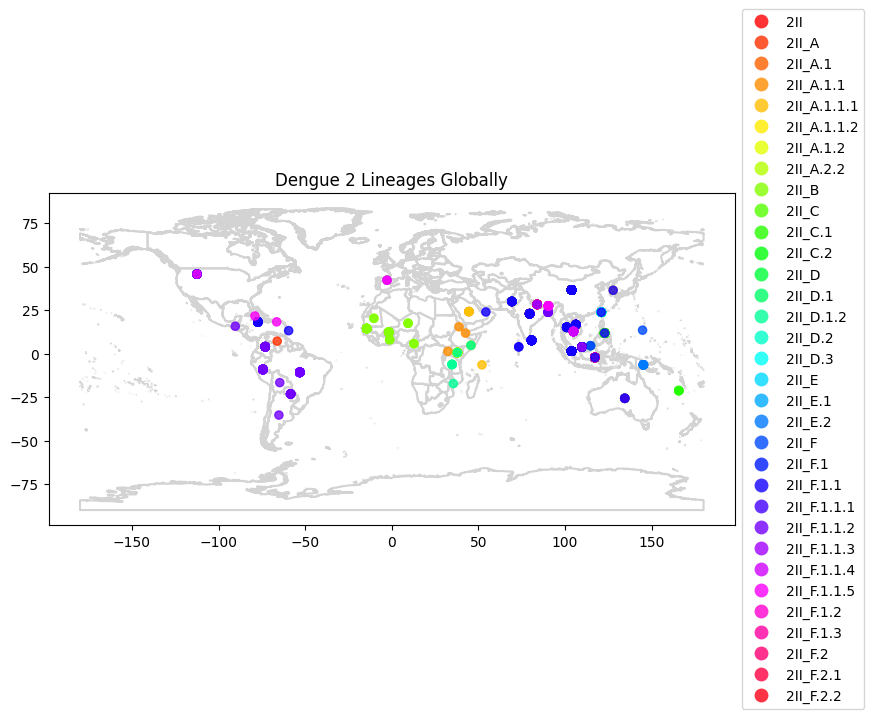

In [7]:

# Adjust the file path to point to your downloaded metadata file
metadata_file = "/Users/dinukaariyaratne/Downloads/nextstrain_community_grubaughlab_DENV-genomics_d2_metadata (1).tsv"
df = pd.read_csv(metadata_file, sep="\t")

# Load Natural Earth shapefile 
# world_countries = gpd.read_file("/Users/dinukaariyaratne/Downloads/110m_cultural/ne_110m_admin_0_countries.shp")
world_countries = gpd.read_file("/Users/dinukaariyaratne/Downloads/10m_cultural/ne_10m_admin_0_countries.shp")

df['Location'] = df['Location'].str.replace('-', ' ')
df['Location'] = df['Location'].replace({
    'California(USA)': 'United States of America',
    'Florida(USA)': 'United States of America',
})

df_merged = df.merge(
    world_countries[['NAME', 'geometry']],
    left_on='Location',
    right_on='NAME',
    how='left'
)

gdf = gpd.GeoDataFrame(df_merged, geometry='geometry', crs=world_countries.crs)
gdf = gdf[gdf.geometry.notnull()]

if not gdf.empty and gdf.geometry.notnull().all():
    gdf['centroid'] = gdf.geometry.centroid
    gdf.set_geometry('centroid', inplace=True)

    fig, ax = plt.subplots(figsize=(12, 6))
    world_countries.boundary.plot(ax=ax, color='lightgrey', zorder=0.5)
    gdf.dropna(subset=['centroid']).plot(
        ax=ax,
        column='Lineage',
        legend=True,
        markersize=35,
        alpha=0.8,
        zorder=1,
        cmap='hsv',  # Change the colormap here
        legend_kwds={'bbox_to_anchor': (1, 0.5), 'loc': 'center left'}
    )

    plt.title("Dengue 2 Lineages Globally")
    plt.tight_layout()
    plt.show()
else:
    print("No valid geometries found for plotting.")

/Users/dinukaariyaratne/miniconda3/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (144000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


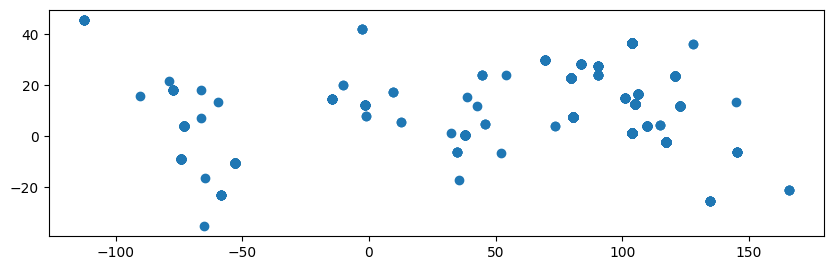

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd
from PIL import Image

# Ensure gdf is defined, e.g., gdf = gpd.read_file("path/to/your/shapefile.shp")

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
gdf.plot(ax=ax)

# Save the figure with high DPI
plt.savefig('map.png', dpi=1200)

# Convert the PNG to TIFF
with Image.open('map.png') as img:
    img.save('/Users/dinukaariyaratne/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PhD USJP/PhD_Thesis/DENV2 paper/map.tiff', dpi=(1200, 1200))